Lernportfolio 8 - Massenbewegung

Monte Carlo Simulation für BW, ZS, BO

In [4]:
# Packages importieren

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Block West

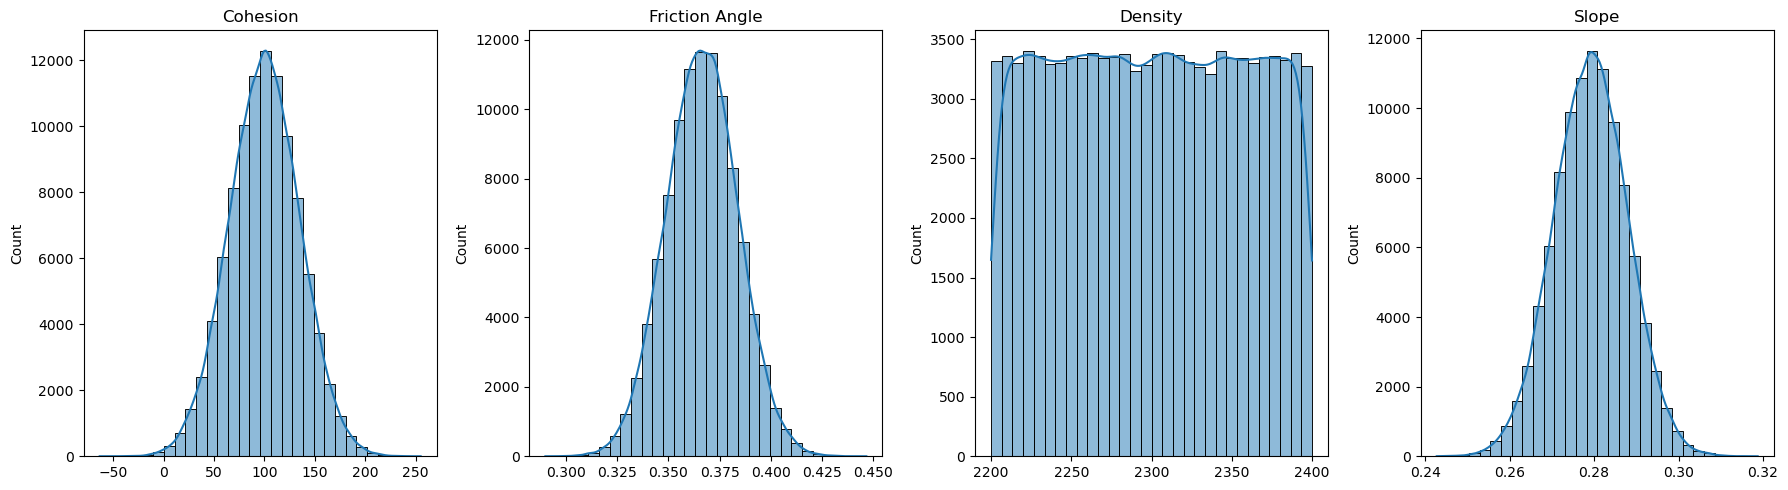

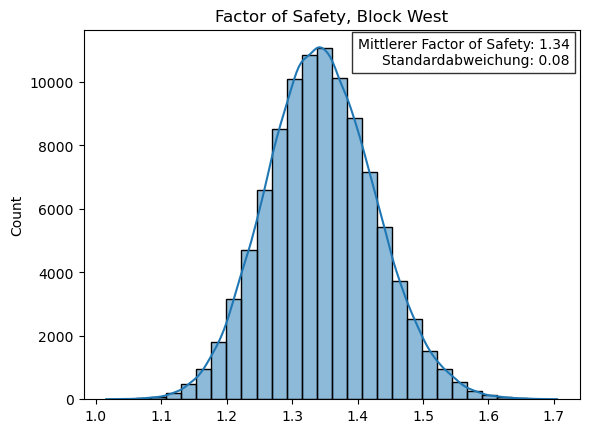

[1.44094229 1.44506845 1.48984441 ... 1.47850148 1.36590985 1.33833125]


In [7]:
# Metaebene                 
g = 9.81   #Gravitation
runs = 100000



# Eingabe der Zufallsvariablen für die MC-Simulation

#cohesion_BW = np.random.normal(227.5, 77, runs)                        # Kohäsion [kPa]
cohesion_BW = np.random.normal(100, 35, runs)                        # Kohäsion [kPa]
friction_angle_BW = np.random.normal(np.radians(21), np.radians(1), runs)  # Reibungswinkel [°]
density_BW = np.random.uniform(2200, 2400, runs)                        # Dichte [kg/m³]     
slope_BW = np.random.normal(np.radians(16), np.radians(0.5), runs)        # Neigung der Gleitfläche [°]


# Restliche Eingabeparameter

H_BW = 40.4      # Höhe des Blocks [m]
A_BW = 15.56     # Aufstandsfläche (=Breite)
U_BW = 0         # Wasserdruck  ('Kraft U resultierend aus Porenwasserdruck ist am Hangfuss 0')
V_BW = 0         # Horizontaler Wasserdruck


# Berechnungen aus den Eingabeparametern

Vol_BW = A_BW * H_BW   # Aufstandsfläche * Höhe
W_BW = density_BW * Vol_BW   # Wichte [kN/m³]
  

# Visualisierung der Zufallsvariablen

fig, axes = plt.subplots(1, 4, figsize=(18, 5))

sns.histplot(cohesion_BW, bins=30, kde=True, ax=axes[0])
axes[0].set_title('Cohesion')

sns.histplot(friction_angle_BW, bins=30, kde=True, ax=axes[1])
axes[1].set_title('Friction Angle')

sns.histplot(density_BW, bins=30, kde=True, ax=axes[2])
axes[2].set_title('Density')

sns.histplot(slope_BW, bins=30, kde=True, ax=axes[3])
axes[3].set_title('Slope')

plt.tight_layout()
plt.show()

df = pd.DataFrame({'cohesion': cohesion_BW, 'friction_angle': friction_angle_BW, 'density': density_BW, 'slope': slope_BW})



# Factor of Safety berechnen

Fs_BW = cohesion_BW*A_BW+(W_BW*np.cos(slope_BW)-U_BW-V_BW*np.sin(slope_BW))*np.tan(friction_angle_BW)
Fd_BW = W_BW*np.sin(slope_BW)+V_BW*np.cos(slope_BW)

FoS_BW = Fs_BW / Fd_BW


sns.histplot(FoS_BW, bins=30, kde=True)
plt.title('Factor of Safety, Block West')
plt.gca().text(0.98, 0.98,
    f'Mittlerer Factor of Safety: {FoS_BW.mean():.2f}\nStandardabweichung: {FoS_BW.std():.2f}',
    ha='right', va='top',
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

plt.show()

print(FoS_BW)


Zerrspalte

Block Ost

Sensitivitätsanalyse Block West

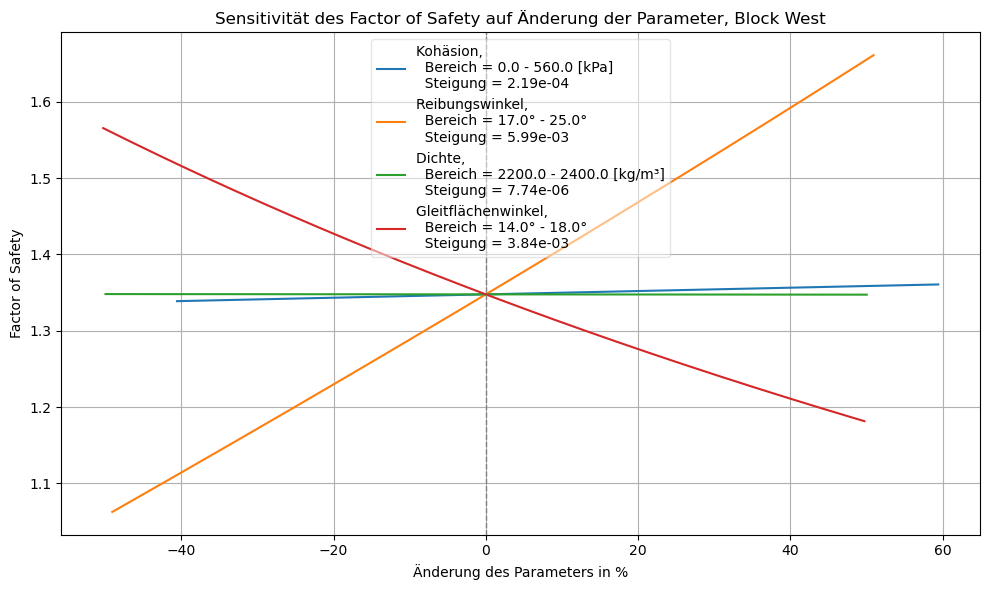

In [6]:
# Define ranges for each parameter
cohesion_min, cohesion_max = 0, cohesion_BW.max() # cohesion_min kann auch auf cohesion_BW.min() gesetzt werden, wenn cohesion_BW.min() > 0
friction_angle_min, friction_angle_max = friction_angle_BW.min(), friction_angle_BW.max()
density_min, density_max = density_BW.min(), density_BW.max()
slope_min, slope_max = slope_BW.min(), slope_BW.max()

# Cohesion
cohesion_range = np.linspace(cohesion_min, cohesion_max, 200)
cohesion_pct = 100 * (cohesion_range - cohesion_BW.mean()) / (cohesion_max - cohesion_min)  # percent change from mean
W = density_BW.mean() * Vol_BW
Fs = cohesion_range * A_BW + (W * np.cos(slope_BW.mean()) - U_BW - V_BW * np.sin(slope_BW.mean())) * np.tan(friction_angle_BW.mean())
Fd = W * np.sin(slope_BW.mean()) + V_BW * np.cos(slope_BW.mean())
FS_cohesion = Fs / Fd

# Friction angle
friction_angle_range = np.linspace(friction_angle_min, friction_angle_max, 200)
friction_angle_pct = 100 * (friction_angle_range - friction_angle_BW.mean()) / (friction_angle_max - friction_angle_min)
Fs = cohesion_BW.mean() * A_BW + (W * np.cos(slope_BW.mean()) - U_BW - V_BW * np.sin(slope_BW.mean())) * np.tan(friction_angle_range)
Fd = W * np.sin(slope_BW.mean()) + V_BW * np.cos(slope_BW.mean())
FS_friction = Fs / Fd

# Density
density_range = np.linspace(density_min, density_max, 200)
density_pct = 100 * (density_range - density_BW.mean()) / (density_max - density_min)
W_range = density_range * Vol_BW
Fs = cohesion_BW.mean() * A_BW + (W_range * np.cos(slope_BW.mean()) - U_BW - V_BW * np.sin(slope_BW.mean())) * np.tan(friction_angle_BW.mean())
Fd = W_range * np.sin(slope_BW.mean()) + V_BW * np.cos(slope_BW.mean())
FS_density = Fs / Fd

# Slope
slope_range = np.linspace(slope_min, slope_max, 200)
slope_pct = 100 * (slope_range - slope_BW.mean()) / (slope_max - slope_min)
Fs = cohesion_BW.mean() * A_BW + (W * np.cos(slope_range) - U_BW - V_BW * np.sin(slope_range)) * np.tan(friction_angle_BW.mean())
Fd = W * np.sin(slope_range) + V_BW * np.cos(slope_range)
FS_slope = Fs / Fd

# Legende
Ber_coh = f'{cohesion_range.min().round(-1)} - {cohesion_range.max().round(-1)}'
Aend_coh_unform = (FS_cohesion.max() - FS_cohesion.min())/(cohesion_pct.max() - cohesion_pct.min())
Aend_coh = '{:.2e}'.format(Aend_coh_unform)

Ber_fri = f'{np.rad2deg(friction_angle_range.min()).round()}° - {np.rad2deg(friction_angle_range.max()).round()}'
Aend_fri_unform = (FS_friction.max() - FS_friction.min())/(friction_angle_pct.max() - friction_angle_pct.min())
Aend_fri= '{:.2e}'.format(Aend_fri_unform)

Ber_den =  f'{density_range.min().round(0)} - {density_range.max().round(-1)}'
Aend_den_unform = (FS_density.max() - FS_density.min())/(density_pct.max() - density_pct.min())
Aend_den = '{:.2e}'.format(Aend_den_unform)

Ber_slo = f'{np.rad2deg(slope_range.min()).round()}° - {np.rad2deg(slope_range.max()).round()}°'
Aend_slo_unform = (FS_slope.max() - FS_slope.min())/(slope_pct.max() - slope_pct.min())
Aend_slo = '{:.2e}'.format(Aend_slo_unform)


# Plot all in one graph
plt.figure(figsize=(10, 6))
plt.plot(cohesion_pct, FS_cohesion, label= f'Kohäsion, \n  Bereich = {Ber_coh} [kPa] \n  Steigung = {Aend_coh}')
plt.plot(friction_angle_pct, FS_friction, label= f'Reibungswinkel, \n  Bereich = {Ber_fri}° \n  Steigung = {Aend_fri}')
plt.plot(density_pct, FS_density, label= f'Dichte, \n  Bereich = {Ber_den} [kg/m³]\n  Steigung = {Aend_den}')
plt.plot(slope_pct, FS_slope, label= f'Gleitflächenwinkel, \n  Bereich = {Ber_slo}\n  Steigung = {Aend_slo}')
plt.axvline(0, color='grey', linestyle='--', linewidth=1)
plt.xlabel('Änderung des Parameters in %')
plt.ylabel('Factor of Safety')
plt.title('Sensitivität des Factor of Safety auf Änderung der Parameter, Block West')
plt.legend(framealpha=0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

